<a href="https://www.kaggle.com/code/ayushpandey098/heart-disease-notebook?scriptVersionId=92206190" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/heart-disease-dataset/heart.csv


In [2]:
#loading required python modules 
import pandas as pd 
import numpy as np 
import sklearn 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics,svm
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
heart_df = pd.read_csv('/kaggle/input/heart-disease-dataset/heart.csv')
heart_df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
heart_df.info()  #looking at the information of type of data present in the dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
heart_df.describe(include = 'all') #describing all the statistical data of the columns 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
heart_df.corr().style.background_gradient() # correlation matrix for 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


From correlation we can infer that the target data is highly correlated with chestpain[cp](~0.43) , thalach , and slope

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

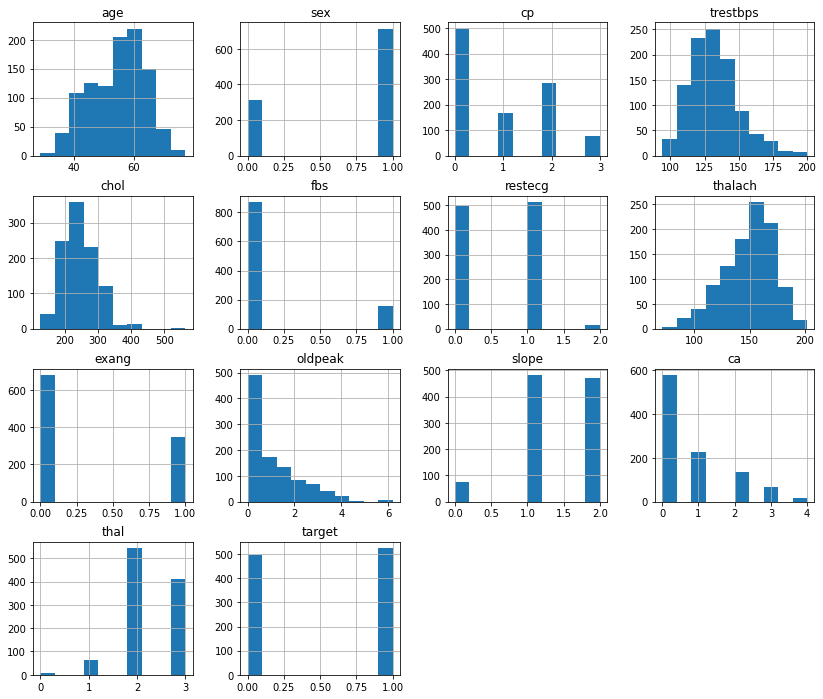

In [7]:
heart_df.hist(figsize = (14,12)) #shows graphically the value counts of each column 

In [8]:
'''making the value and target dataset for further processing
this function performs the alocation of the dataset to the required variable for model training. 
also the datavalues are preprocessed to have the values between 0 and 1
x -----------> contains the columns we will be using for hypothesis 
y -----------> contains the target column'''

def data(heart_df) :
    x = heart_df[['cp','thalach','slope']]
    y = heart_df['target']
    Sc = StandardScaler()
    x1 = Sc.fit_transform(x)
    return x1,y

In [9]:
X,y = data(heart_df)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

# Applying KNN classifier 
****

In [10]:
Kn = KNeighborsClassifier(n_neighbors = 3)
model = Kn.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_predmeta = model.predict(X_train)
print(metrics.accuracy_score(y_test,y_pred))
print(metrics.accuracy_score(y_train,y_predmeta))
print(metrics.precision_score(y_test,y_pred))

0.8731707317073171
0.9231707317073171
0.8532110091743119


#   Applying XGBClassifier
****

In [11]:
model1 = XGBClassifier()
model1.fit(X_train,y_train)
y_pred1 = model1.predict(X_test)
y_predmeta1 = model1.predict(X_train)
print(metrics.accuracy_score(y_test,y_pred1))
print(metrics.accuracy_score(y_train,y_predmeta1))
print(metrics.precision_score(y_test,y_pred1))
print(metrics.log_loss(y_test,y_pred1))

[21:02:54] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.9170731707317074
0.9329268292682927
0.8909090909090909
2.8642380189397274


# Applying Decission tree with boosting
****

In [12]:
from sklearn.ensemble import AdaBoostClassifier
tree = DecisionTreeClassifier(max_depth = 5 , random_state = 23)
addboost = AdaBoostClassifier(base_estimator = tree , n_estimators = 5,learning_rate = 0.1 ,algorithm = 'SAMME.R',random_state = 23)
model2 = addboost.fit(X_train,y_train)
y_pred2 = addboost.predict(X_test)
print(f"training_score : {addboost.score(X_train,y_train)}")
print(f"testing_score : {addboost.score(X_test,y_test)}")
print(metrics.precision_score(y_test,y_pred2))
print(metrics.log_loss(y_test,y_pred2))

training_score : 0.9060975609756098
testing_score : 0.8926829268292683
0.8785046728971962
3.7066510997786715


# Applying SVM
****

In [13]:
model3 = svm.SVC(kernel = 'linear')
model3.fit(X_train,y_train)
y_pred3 = model3.predict(X_test)
y_predmeta3 = model3.predict(X_train)
print(f"training accuracy: {metrics.accuracy_score(y_train,y_predmeta3)}")
print(f"testing accuracy: {metrics.accuracy_score(y_test,y_pred3)}")
print(f"loss : {metrics.log_loss(y_test,y_pred3)}")

training accuracy: 0.7658536585365854
testing accuracy: 0.7414634146341463
loss : 8.929662127063574


The Conlusion drawn from above methods is that the prediction model is working at better rate when trained with XGBoost classifier giving training and testing accuracy close approximately 90% and the loss is ledd compared to other models. Yes, there is an option of adding more features to see how the target prediction is changing but through correlation I have selcted the ones with which the target column is most correlated. 
